In [3]:
from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torch import optim
import torch.nn as nn
import shutil
import torch
import os

The Dataset downloading:

https://www.kaggle.com/datasets/schnappsidee/simpson-dataset-remade-by-students-of-nsu

(I'm still learning the kaggle so, please, if something doesn't work -> contact me with dmrzlobin@gmail.com)

Downloading the main training dataset:

In [48]:
list_of_heroes = ['abraham_grampa_simpson', 'agnes_skinner', 'apu_nahasapeemapetilon', 'barney_gumble',
                  'bart_simpson', 'carl_carlson', 'charles_montgomery_burns', 'chief_wiggum', 'cletus_spuckler',
                  'comic_book_guy', 'disco_stu', 'edna_krabappel', 'fat_tony', 'gil', 'groundskeeper_willie',
                  'homer_simpson', 'kent_brockman', 'krusty_the_clown', 'lenny_leonard', 'lionel_hutz', 'lisa_simpson',
                  'maggie_simpson', 'marge_simpson', 'martin_prince', 'mayor_quimby', 'milhouse_van_houten', 'miss_hoover',
                  'moe_szyslak', 'ned_flanders', 'nelson_muntz', 'otto_mann', 'patty_bouvier', 'principal_skinner',
                  'professor_john_frink', 'rainier_wolfcastle', 'ralph_wiggum', 'selma_bouvier', 'sideshow_bob', 'sideshow_mel',
                  'snake_jailbird', 'troy_mcclure', 'waylon_smithers']
print(f'Number of all classes: {len(list_of_heroes)}')

Number of all classes: 42


In [54]:
source_dir = 'simpsons_dataset/simpsons_dataset/'
end_dir = 'filtered_dataset'

for hero_name in list_of_heroes:
    old_folder_path = os.path.join(source_dir, hero_name)

    c = 0
    for img in os.listdir(old_folder_path):
        old_img_path = os.path.join(old_folder_path, img)

        if not os.path.isfile(old_img_path):
            continue

        new_img_name = f"{hero_name}__picture{c}.jpg"
        new_img_path = os.path.join(end_dir, new_img_name)

        shutil.copy(old_img_path, new_img_path)
        c += 1

print('ok')

ok


Images tensoring and normalization:

In [50]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(256),
    transforms.ToTensor(),
    transforms.Normalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225])
])

dataset = datasets.ImageFolder(root = 'simpsons_dataset_v2/train/', transform = preprocess)
torch.save(dataset, 'processed_dataset.pth')

In [51]:
dataset = torch.load('processed_dataset.pth', weights_only = False)
dataloader = DataLoader(dataset, batch_size = 32, shuffle = True)

In [52]:
print(dataset.classes)

['abraham_grampa_simpson', 'agnes_skinner', 'apu_nahasapeemapetilon', 'barney_gumble', 'bart_simpson', 'carl_carlson', 'charles_montgomery_burns', 'chief_wiggum', 'cletus_spuckler', 'comic_book_guy', 'disco_stu', 'edna_krabappel', 'fat_tony', 'gil', 'groundskeeper_willie', 'homer_simpson', 'kent_brockman', 'krusty_the_clown', 'lenny_leonard', 'lionel_hutz', 'lisa_simpson', 'maggie_simpson', 'marge_simpson', 'martin_prince', 'mayor_quimby', 'milhouse_van_houten', 'miss_hoover', 'moe_szyslak', 'ned_flanders', 'nelson_muntz', 'otto_mann', 'patty_bouvier', 'principal_skinner', 'professor_john_frink', 'rainier_wolfcastle', 'ralph_wiggum', 'selma_bouvier', 'sideshow_bob', 'sideshow_mel', 'snake_jailbird', 'troy_mcclure', 'waylon_smithers']


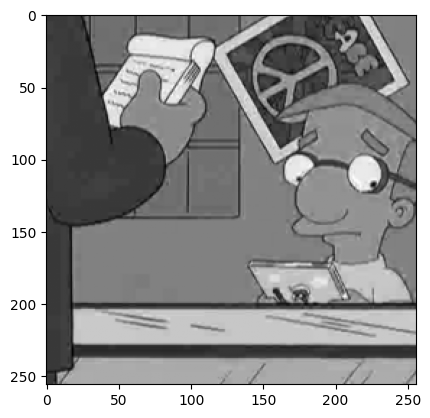

Image class: 25
One feature batch shape: torch.Size([32, 3, 256, 256])
One label batch shape: torch.Size([32])


In [53]:
train_features, train_labels = next(iter(dataloader))

current_image, current_label = train_features[0].mean(dim = 0).squeeze(), train_labels[0]
plt.imshow(current_image, cmap = 'gray')
plt.show()
print(f'Image class: {current_label}')
print(f'One feature batch shape: {train_features.shape}')
print(f'One label batch shape: {train_labels.shape}')

In [54]:
print(dataset[0][0])  # ['abraham_simpson'] tensor
print(dataset[0][1]) #  ['abraham_simpson'] -> label ('0')

tensor([[[-0.9534, -1.2445, -1.2445,  ...,  0.3138,  0.3309,  0.2282],
         [-1.0562, -1.2103, -1.1247,  ...,  0.2967,  0.3481,  0.2282],
         [-1.1760, -1.1760, -0.9363,  ...,  0.3138,  0.3481,  0.2453],
         ...,
         [ 0.1768,  0.0741,  0.0569,  ...,  1.7009,  1.7009,  1.7009],
         [ 0.3481,  0.1768,  0.0398,  ...,  1.7009,  1.7009,  1.7009],
         [ 0.2624,  0.1597,  0.1083,  ...,  1.7009,  1.7009,  1.7009]],

        [[-0.5126, -0.8452, -0.8452,  ...,  0.4153,  0.4328,  0.3627],
         [-0.6001, -0.8102, -0.7227,  ...,  0.3978,  0.4503,  0.3627],
         [-0.7402, -0.7752, -0.5301,  ...,  0.4153,  0.4503,  0.3803],
         ...,
         [ 0.1702,  0.1176,  0.0476,  ...,  1.0455,  1.0455,  1.0455],
         [ 0.2752,  0.1877, -0.0049,  ...,  1.0455,  1.0455,  1.0455],
         [ 0.1352,  0.1352,  0.0651,  ...,  1.0455,  1.0455,  1.0455]],

        [[ 0.6356,  0.3219,  0.3219,  ...,  1.3328,  1.3502,  1.2282],
         [ 0.5485,  0.3568,  0.4439,  ...,  1

Resnet Architechture Realization:

In [55]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [56]:
# Residual Block:

class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride = 1, downsample = None):
        super(ResidualBlock, self).__init__()
        self.conv1 = nn.Sequential(
                    nn.Conv2d(in_channels, out_channels, kernel_size = 3, stride = stride, padding = 1, bias = False),
                    nn.BatchNorm2d(out_channels),
                    nn.ReLU())
        self.conv2 = nn.Sequential(
                    nn.Conv2d(out_channels, out_channels, kernel_size = 3, stride = 1, padding = 1, bias = False),
                    nn.BatchNorm2d(out_channels))
        self.downsample = downsample
        self.relu = nn.ReLU()

    def forward(self, x):
        residual = x
        first_out = self.conv1(x)
        second_out = self.conv2(first_out)
        if self.downsample is not None:
            residual = self.downsample(x)
        second_out += residual

        final_result = self.relu(second_out)
        return final_result

In [57]:
# The Main ResNet architecture:

class ResNet(nn.Module):
    def __init__(self, ResidualBlock, layers, num_classes):
        super(ResNet, self).__init__()
        
        self.inplanes = 64
        self.conv1 = nn.Sequential(
                    nn.Conv2d(3, 64, kernel_size = 7, stride = 2, padding = 3, bias = False),
                    nn.BatchNorm2d(64),
                    nn.ReLU(inplace = True))
        self.maxpool = nn.MaxPool2d(kernel_size = 3, stride = 2, padding = 1)
        
        self.layer1 = self._make_layer(ResidualBlock, 64, layers[0], stride = 1)
        self.layer2 = self._make_layer(ResidualBlock, 128, layers[1], stride = 2)
        self.layer3 = self._make_layer(ResidualBlock, 256, layers[2], stride = 2)
        self.layer4 = self._make_layer(ResidualBlock, 512, layers[3], stride = 2)
        self.avgpool = self.avgpool = nn.AdaptiveAvgPool2d(1)

        self.outlayer = nn.Linear(512, num_classes, bias = False)

    def _make_layer(self, block, planes, num_of_ResidualBlocks, stride = 1):
        
        downsample = None
        if stride != 1 or self.inplanes != planes:
            downsample = nn.Sequential(
                        nn.Conv2d(self.inplanes, planes, kernel_size = 1, stride = stride, bias = False),
                        nn.BatchNorm2d(planes))
        layers = []
        layers.append(ResidualBlock(self.inplanes, planes, stride, downsample))
        self.inplanes = planes
        for i in range(1, num_of_ResidualBlocks):
            layers.append(block(self.inplanes, planes))

        return nn.Sequential(*layers)

    def forward(self, x):
        x = self.conv1(x)
        x = self.maxpool(x)
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)

        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.outlayer(x)

        return x

ResNet Model Learning:

In [58]:
num_classes = 42
epochs = 20
batch_size = 32
learning_rate = 0.01

model = ResNet(ResidualBlock, [3, 4, 6, 3], num_classes).to(device)

# Loss and Optimizer (for now in a simple view):
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = learning_rate)

In [62]:
# training function:
def train_function(dataloader, model, loss_fn, optimizer, epochs):
    
    model.train()
    for epoch in range(epochs):
        running_loss = 0.0
        for batch, (X, y) in enumerate(dataloader):

            images, labels = X.to(device), y.to(device)
            optimizer.zero_grad()
            
            # Compute prediction and loss:
            prediction = model(images)
            loss = loss_fn(prediction, labels)
    
            # Backpropagation:
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

            if batch % 200 == 0:
                print(f"Epoch [{epoch + 1} / {epochs}], Batch [{batch + 1} / {len(dataloader)}], Loss: {loss.item():.5f}\n")
         
        print(f'For the {epoch + 1} epoch the loss is about: {(running_loss / len(dataloader)):.5f}...')

In [ ]:
train_function(dataloader, model, criterion, optimizer, epochs)
# Model Saving:
torch.save(model.state_dict(), "resnet.pth")

ResNet Model testing:

In [69]:
model = ResNet(ResidualBlock, [3, 4, 6, 3], num_classes).to(device)
model.load_state_dict(torch.load("resnet.pth"))

<All keys matched successfully>

In [67]:
test_dataset = datasets.ImageFolder(root = 'simpsons_dataset_v2/test/', transform = preprocess)
torch.save(dataset, 'processed_test_dataset.pth')

In [70]:
test_dataset = torch.load('processed_test_dataset.pth', weights_only = False)
test_dataloader = DataLoader(test_dataset, batch_size = 32, shuffle = True)

In [72]:
# test function:
def test_function(model, test_dataloader):

    model.eval()
    correct, total = 0, 0
    
    with torch.no_grad():
        for images, labels in test_dataloader:
            images, labels = images.to(device), labels.to(device)
            
            # Predictions:
            outputs = model(images)
            _, predicted = torch.max(outputs, 1)
            
            # Count of the right answers:
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    accuracy = 100 * (correct / total)
    return accuracy

accuracy = test_function(model, test_dataloader)
print(f'Accuracy on the test set is about: {accuracy:.3f}%')

Accuracy on the test set is about: 99.540%


In [73]:
# ...